In [1]:
import pandas as pd
import numpy as np


In [2]:
advTeamStats = pd.read_csv("Basketball_Stats/advanced_team_stats.csv")
finalSVUStats = pd.read_csv("Basketball_Stats/final_svu_teams.csv")
miscTeamStats = pd.read_csv("Basketball_Stats/misc_team_stats.csv")
winslosses = pd.read_csv("Basketball_Stats/nbaseas1.csv")
shotinfo = pd.read_csv("Basketball_Stats/nbaseas2.csv")
NBAstatsTeam = pd.read_csv("Basketball_Stats/nbaseasadv.csv")
teamDef = pd.read_csv("Basketball_Stats/nbaTeamDef2014_2016.csv")


In [36]:
advTeamStats.head()


,ast_pct,ast_ratio,ast_tov,def_rating,dreb_pct,efg_pct,game_id,min,off_rating,opponent_id,...,pace,period,pie,season,team_id,tm_tov_pct,treb_pct,ts_pct,usg_pct,team
0,0.650,19.6,1.37,110.6,0.667,0.581,21400008,240:00:00,105.7,1610612761,...,97.50,f,0.453,2014,1610612737,19.7,0,0.583,0.196,Hawks
1,0.743,21.2,2.00,94.6,0.756,0.558,21400032,240:00:00,109.1,1610612754,...,95.38,f,0.606,2014,1610612737,13.9,0,0.611,0.198,Hawks
2,0.684,19.0,1.86,98.2,0.711,0.457,21400064,240:00:00,91.2,1610612759,...,98.28,f,0.439,2014,1610612737,13.9,0,0.475,0.198,Hawks
3,0.615,17.3,1.41,100.0,0.744,0.523,21400071,265:00:00,102.4,1610612766,...,98.46,f,0.458,2014,1610612737,15.8,0,0.564,0.200,Hawks
4,0.545,14.5,2.00,105.7,0.690,0.463,21400084,240:00:00,109.8,1610612752,...,92.34,f,0.541,2014,1610612737,9.6,0,0.532,0.198,Hawks


In [37]:
finalSVUStats.head()

,cfga,cfgm,dfga,dfgm,dist,drbc,ftast,game_id,opponent_id,orbc,pass,period,sast,season,spd,tchs,team_id,ufga,ufgm,team
0,39,17,33,13,9.99,56,3,21400008,1610612761,23,127,f,9,2014,0,127,1610612737,41,23,Hawks
1,28,12,26,17,9.99,58,4,21400032,1610612754,12,127,f,5,2014,0,127,1610612737,41,23,Hawks
2,51,23,35,19,9.99,50,1,21400064,1610612759,32,127,f,3,2014,0,127,1610612737,41,15,Hawks
3,45,21,34,23,9.99,53,1,21400071,1610612766,14,127,f,6,2014,0,127,1610612737,48,22,Hawks
4,42,19,35,23,9.99,52,3,21400084,1610612752,21,127,f,4,2014,0,127,1610612737,39,14,Hawks


In [38]:
miscTeamStats.head()

,blk,blka,game_id,opp_pts_2nd_chance,opp_pts_fb,opp_pts_off_tov,opp_pts_paint,opponent_id,period,pf,pfd,pts_2nd_chance,pts_fb,pts_off_tov,pts_paint,season,team_id,team
0,8,9,21400008,26,18,23,40,1610612761,f,24,22,11,10,14,36,2014,1610612737,Hawks
1,6,5,21400032,24,5,13,26,1610612754,f,20,26,5,15,20,28,2014,1610612737,Hawks
2,5,9,21400064,14,18,15,34,1610612759,f,25,15,13,11,14,40,2014,1610612737,Hawks
3,2,7,21400071,22,1,22,50,1610612766,f,30,28,11,15,18,38,2014,1610612737,Hawks
4,5,6,21400084,15,9,12,40,1610612752,f,17,29,19,10,17,34,2014,1610612737,Hawks


In [39]:
shotinfo.rename(columns = {"Team":"team"}).head()

,team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,...,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,...,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,...,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,...,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,...,2634,3490,1777,1094,700,347,424,1567,1662,266


In [40]:
advmiscteam = advTeamStats.merge(miscTeamStats,on="game_id")

In [41]:
advmiscsvuDF = advmiscteam.merge(finalSVUStats,on="game_id")

In [42]:
teamsDF = advmiscsvuDF[['game_id','team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF.head()


,game_id,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,21400008,Hawks,2014,41,23,14,36
1,21400008,Raptors,2014,43,17,14,36
2,21400008,Hawks,2014,41,23,23,40
3,21400008,Raptors,2014,43,17,23,40
4,21400008,Hawks,2014,41,23,14,36


In [43]:
teamsDF2 = teamsDF.groupby(["team","game_id","season"]).sum()

In [44]:
teamsDF3 = teamsDF2.reset_index()
teamsDF3.head()

,team,game_id,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,21400005,2014,88,32,74,160
1,76ers,21400023,2014,132,52,86,184
2,76ers,21400030,2014,124,60,100,160
3,76ers,21400043,2014,144,68,124,132
4,76ers,21400058,2014,156,68,68,200


In [45]:
teamsDF4 = teamsDF3[['team','season','ufga','ufgm','pts_off_tov','pts_paint']]
teamsDF4.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint
0,76ers,2014,88,32,74,160
1,76ers,2014,132,52,86,184
2,76ers,2014,124,60,100,160
3,76ers,2014,144,68,124,132
4,76ers,2014,156,68,68,200


df1 = teamsDF4.loc[teamsDF4["team"]=="Bulls"]

writer = pd.ExcelWriter('NBA.xlsx')
df1.to_excel(writer,'Sheet1')


In [46]:
teamsDF5 = teamsDF4.groupby(["team","season"]).sum()
teamsDF6 = teamsDF5.reset_index()
teamsDF6["ufgp"] = teamsDF6["ufgm"] / teamsDF6["ufga"]
teamsDF6.sort_values("ufgp",ascending = False).head()


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp
85,Warriors,2015,16728,8280,6948,18348,0.494978
89,Wizards,2016,1384,648,608,1512,0.468208
84,Warriors,2014,16408,7664,7050,17724,0.467089
86,Warriors,2016,1436,668,640,1684,0.465181
15,Clippers,2014,16248,7528,5926,15028,0.463319


df1 = teamsDF5
writer = pd.ExcelWriter('NBADF.xlsx')
df1.to_excel(writer,'Sheet1')


In [47]:
winslosses2 = winslosses.rename(columns={"Team":"team","Season":"season"})
winslosses2.head()

,team,Wins,Losses,season
0,Warriors,67,15,2014
1,Hawks,60,22,2014
2,Rockets,56,26,2014
3,Clippers,56,26,2014
4,Grizzlies,55,27,2014


In [48]:
FinalNBADF = teamsDF6.merge(winslosses2,on=["team","season"])

In [49]:
FinalNBADF.sort_values("Wins",ascending=False).head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses
82,Warriors,2015,16728,8280,6948,18348,0.494978,73,9
81,Warriors,2014,16408,7664,7050,17724,0.467089,67,15
70,Spurs,2015,14888,6848,7772,21476,0.459968,67,15
83,Warriors,2016,1436,668,640,1684,0.465181,67,15
71,Spurs,2016,1548,656,568,1476,0.423773,61,21


In [50]:
shotinfo.head()

,Team,season,FGM,FGA,FG%,2pm,2pa,2p%,3PM,3PA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Warriors,2014,3410,7137,47.8,2527,4920,0.513618,883,2217,...,2814,3667,2248,1185,762,496,293,1628,1541,828
1,Hawks,2014,3121,6699,46.6,2303,4547,0.506488,818,2152,...,2611,3326,2111,1167,744,380,404,1457,1611,445
2,Rockets,2014,3032,6832,44.4,2099,4152,0.505539,933,2680,...,2624,3582,1820,1366,776,407,437,1803,1730,282
3,Clippers,2014,3228,6830,47.3,2401,4628,0.518799,827,2202,...,2711,3495,2031,1012,640,409,245,1749,1766,540
4,Grizzlies,2014,3097,6763,45.8,2674,5517,0.484684,423,1246,...,2634,3490,1777,1094,700,347,424,1567,1662,266


In [51]:
shotinfo2 = shotinfo[["Team", "season"]]

In [52]:
shotinfo2 = shotinfo.rename(columns = {"Team":"team"})

In [53]:
FinalDF = FinalNBADF.merge(shotinfo2,on=["team","season"])
FinalDF.sort_values("pts_paint",ascending=True)
FinalDF["UncontestedAssists"] = FinalDF["ufgm"] / FinalDF["AST"]
FinalDF.head()


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,UncontestedAssists
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,...,3514,1683,1453,789,487,454,1778,1657,-736,2.742721
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,...,3382,1765,1343,680,495,466,1780,1571,-839,2.946176
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,...,3513,1949,1366,692,420,446,1793,1610,-467,0.322217
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,...,3450,1932,1373,789,403,392,1814,1649,35,3.016563
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,...,3417,1895,1247,672,475,462,1695,1600,-343,2.290237


In [54]:
FinalDF2 = FinalDF.merge(NBAstatsTeam, on=["team","season"])
FinalDF2.head()

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,AST/TO,AST RAT,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,...,1.48,18.5,26.4,78.3,53.1,17.1,51.8,55.3,103.13,51.3
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,...,1.31,16.3,20.6,74.0,46.4,16.2,48.7,51.9,100.23,42.8
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,...,1.43,17.6,22.4,75.3,48.8,16.4,50.1,53.9,100.96,47.0
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,...,1.67,17.5,18.8,76.3,47.3,13.7,53.4,56.9,97.37,50.3
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,...,1.52,17.7,24.9,73.1,49.2,15.7,49.9,53.7,96.55,48.3


In [55]:
FinalDF3 = FinalDF2.merge(teamDef, on = ["team","season"])
FinalDF3.head()
finalDFcorr = FinalDF3

In [56]:
FinalDF3["Wins"].corr(FinalDF3["ufgp"])

0.46855361898066505

In [57]:
finalDFcolumns = FinalDF3.columns.values.tolist()
finalDFcolumns

['team',
 'season',
 'ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'FGM',
 'FGA',
 'FG%',
 '2pm',
 '2pa',
 '2p%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'GP_x',
 'W_x',
 'L_x',
 'MIN_x',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'GP_y',
 'W_y',
 'L_y',
 'MIN_y',
 'DEF\xa0RTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPP\xa0PTS OFF\xa0TOV',
 'OPP\xa0PTS 2ND\xa0CHANCE',
 'OPP\xa0PTS FB',
 'OPP\xa0PTS PAINT']

In [58]:
FinalDFcorr = FinalDF3[['ufga',
 'ufgm',
 'pts_off_tov',
 'pts_paint',
 'ufgp',
 'Wins',
 'Losses',
 'OREB',
 'DREB_x',
 'REB',
 'AST',
 'TOV',
 'STL_x',
 'BLK_x',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'UncontestedAssists',
 'OFFRTG',
 'DEFRTG',
 'NETRTG',
 'AST%',
 'AST/TO',
 'AST RAT',
 'OREB%',
 'DREB%_x',
 'REB%',
 'TOV%',
 'EFG%',
 'TS%',
 'PACE',
 'PIE',
 'DEF\xa0RTG',
 'DREB_y',
 'DREB%_y',
 'STL_y',
 'BLK_y',
 'OPP\xa0PTS OFF\xa0TOV',
 'OPP\xa0PTS 2ND\xa0CHANCE',
 'OPP\xa0PTS FB',
 'OPP\xa0PTS PAINT']]

In [59]:
FinalDF3["Wins"].corr(FinalDF3["TOV%"])

-0.22778305122142933

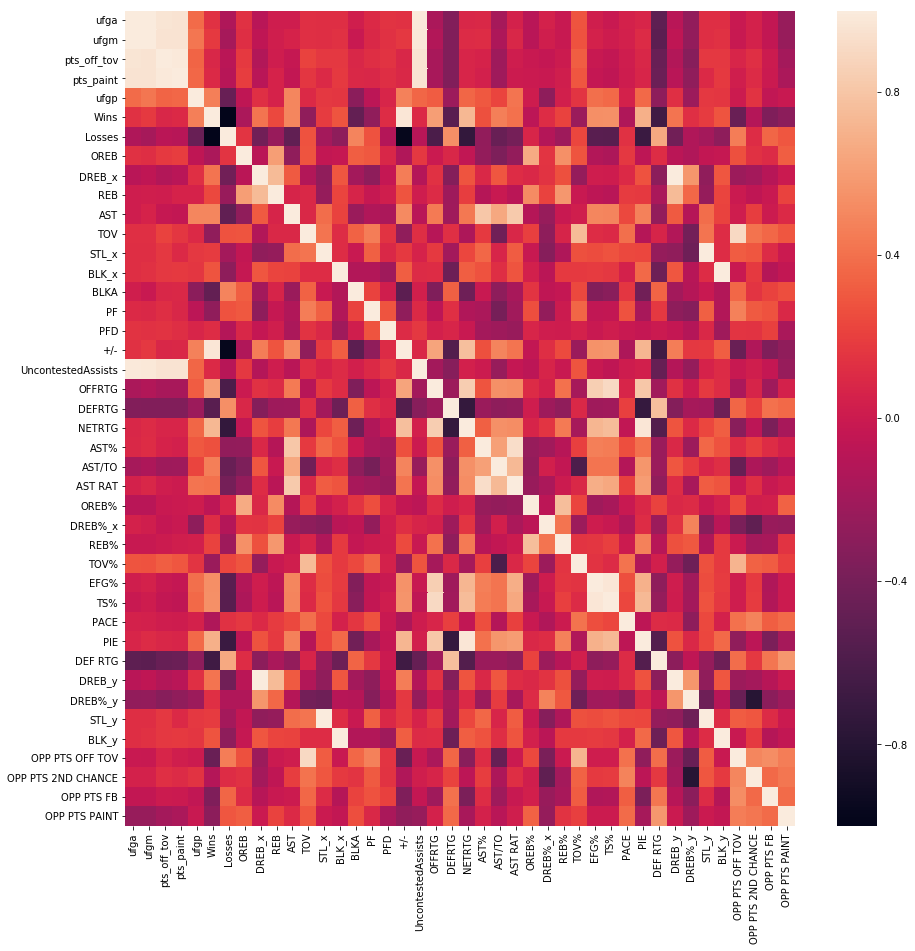

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = FinalDFcorr.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

FinalDF3.to_excel("FinalDF.xls")

In [61]:
# filter 2014
season_2014 = FinalDF3[FinalDF3['season']== 2014]

#Total Field Goals Made - TFGM 
season_2014['TFGM'] = season_2014['3PM'] + season_2014['2pm']
season_2014.head()




/Users/patrickdancel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,DEF RTG,DREB_y,DREB%_y,STL_y,BLK_y,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,TFGM
0,76ers,2014,11856,4616,6202,13532,0.389339,18,64,2765,...,102,2536,73.0,789,487,1687,1144,1200,3420,2765
3,Bucks,2014,13048,5828,6326,14388,0.446658,41,41,3083,...,99,2574,73.3,789,403,1374,1092,877,3262,3083
6,Bulls,2014,14188,6068,5732,15736,0.427685,50,32,3001,...,102,2792,74.4,514,476,1258,1079,1065,3344,3001
9,Cavaliers,2014,15680,6772,6624,17432,0.431888,53,29,3089,...,104,2612,74.7,603,340,1329,1017,970,3502,3089
12,Celtics,2014,14060,5956,5742,14784,0.423613,40,42,3193,...,102,2685,75.0,674,294,1325,1108,890,3658,3193


In [62]:
# filter 2015
season_2015 = FinalDF3[FinalDF3['season']== 2015]

#Total Field Goals Made - TFGM 
season_2015['TFGM'] = season_2015['3PM'] + season_2015['2pm']
season_2015.head()



/Users/patrickdancel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,DEF RTG,DREB_y,DREB%_y,STL_y,BLK_y,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,TFGM
1,76ers,2015,12640,5200,7514,18092,0.411392,10,72,2970,...,107,2605,74.0,680,495,1639,1207,1370,3736,2970
4,Bucks,2015,9676,4340,5922,15476,0.448532,33,49,3145,...,106,2559,73.1,672,475,1453,1153,1068,3606,3145
7,Bulls,2015,13356,5840,6488,17716,0.437257,42,40,3165,...,104,2889,74.9,495,470,1314,1169,1128,3642,3165
10,Cavaliers,2015,15932,7128,6218,15892,0.447401,57,25,3171,...,102,2777,78.5,551,317,1278,919,917,3344,3171
13,Celtics,2015,13976,5812,7596,19812,0.415856,48,34,3216,...,101,2733,74.6,752,348,1211,1164,888,3524,3216


In [63]:
# filter 2016

season_2016 = FinalDF3[FinalDF3['season']== 2016]

#Total Field Goals Made - TFGM 
season_2016['TFGM'] = season_2016['3PM'] + season_2016['2pm']
season_2016.head()

/Users/patrickdancel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,DEF RTG,DREB_y,DREB%_y,STL_y,BLK_y,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT,TFGM
2,76ers,2016,1564,628,626,1520,0.401535,28,54,3088,...,106,2706,75.3,692,420,1517,1106,1256,3698,3088
5,Bucks,2016,1288,524,660,1644,0.406832,42,40,3182,...,106,2589,75.4,666,436,1331,1040,961,3580,3182
8,Bulls,2016,1476,640,670,1800,0.433604,41,41,3169,...,105,2797,76.8,643,393,1267,977,1125,3710,3169
11,Cavaliers,2016,1400,612,500,1260,0.437143,51,31,3275,...,108,2821,75.8,539,327,1365,1122,1094,3650,3275
14,Celtics,2016,1396,608,562,1560,0.435530,53,29,3168,...,106,2698,75.3,617,340,1245,1143,1002,3544,3168


In [64]:
# Correlation function that correlates every column pair for all 3 years all teams

def get_corrs(FinalDF3):
    col_correlations = FinalDF3.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations
    return cor_pairs.to_dict()

NBA_corrs = get_corrs(FinalDF3)


In [65]:
NBA_corrs

{'+/-': {'+/-': 0.0,
  '2p%': 0.0,
  '2pa': 0.0,
  '2pm': 0.0,
  '3P%': 0.0,
  '3PA': 0.0,
  '3PM': 0.0,
  'AST': 0.0,
  'AST RAT': 0.41988029634337171,
  'AST%': 0.27108911712392075,
  'AST/TO': 0.48775539177854832,
  'BLKA': 0.0,
  'BLK_x': 0.0,
  'BLK_y': 0.32151479036674985,
  'DEFRTG': -0.56401127629955472,
  'DEF\xa0RTG': -0.6612396985370147,
  'DREB%_x': 0.11891430913503444,
  'DREB%_y': 0.16412271931668745,
  'DREB_x': 0.0,
  'DREB_y': 0.45849383126600729,
  'EFG%': 0.55089729027307122,
  'FG%': 0.0,
  'FGA': 0.0,
  'FGM': 0.0,
  'FT%': 0.0,
  'FTA': 0.0,
  'FTM': 0.0,
  'GP_x': 0.014365954340687727,
  'GP_y': nan,
  'L_x': -0.5024321110484754,
  'L_y': -0.97449410770022016,
  'Losses': 0.0,
  'MIN_x': 0.014306591457490218,
  'MIN_y': -0.019958894291845726,
  'NETRTG': 0.76679136055379704,
  'OFFRTG': 0.63457625912610649,
  'OPP\xa0PTS 2ND\xa0CHANCE': -0.12953255896448748,
  'OPP\xa0PTS FB': -0.35809600274851533,
  'OPP\xa0PTS OFF\xa0TOV': -0.45388220074439423,
  'OPP\xa0PTS PA

In [66]:
NBA_corrs_DF = pd.DataFrame.from_dict(NBA_corrs)

In [67]:
NBA_corrs_DF.head()

,+/-,2p%,2pa,2pm,3P%,3PA,3PM,AST,AST RAT,AST%,...,UncontestedAssists,W_x,W_y,Wins,pts_off_tov,pts_paint,season,ufga,ufgm,ufgp
+/-,0.0,0.674917,-0.320334,0.053939,0.660361,0.309857,0.450051,0.510478,0.0,0.0,...,0.0,0.0,0.0,0.974494,0.079300,0.090544,0.014056,0.134817,0.170775,0.470638
2p%,0.0,0.000000,-0.500550,0.046052,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.652470,-0.237557,-0.242668,0.376427,-0.238784,-0.195896,0.418458
2pa,0.0,0.000000,0.000000,0.840422,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,-0.319218,0.211337,0.249762,-0.261396,0.179427,0.179908,0.089603
2pm,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.040468,0.099293,0.139645,-0.062790,0.060078,0.087351,0.353770
3P%,0.0,0.560215,-0.328855,-0.027607,0.000000,0.280056,0.507124,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.650097,-0.113663,-0.116871,0.178184,-0.034752,0.014277,0.497029


In [69]:
FinalDF3[FinalDF3['team'] == 'Trail Blazers']

,team,season,ufga,ufgm,pts_off_tov,pts_paint,ufgp,Wins,Losses,FGM,...,MIN_y,DEF RTG,DREB_y,DREB%_y,STL_y,BLK_y,OPP PTS OFF TOV,OPP PTS 2ND CHANCE,OPP PTS FB,OPP PTS PAINT
